In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for i in range(4):
    globals()[tech_list[i]] = yf.download(tech_list[i], start, end).assign(Company=company_name[i])

company_list = [AAPL, GOOG, MSFT, AMZN]

print(company_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[Price            Close        High         Low        Open    Volume Company
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL        
Date                                                                        
2024-03-04  174.277100  176.068628  172.973243  175.322153  81510100   APPLE
2024-03-05  169.320480  171.231455  168.822830  169.957472  95132400   APPLE
2024-03-06  168.325180  170.435227  167.887245  170.256065  68587700   APPLE
2024-03-07  168.205750  169.927615  167.698152  168.355038  71765100   APPLE
2024-03-08  169.927628  172.883671  168.146047  168.205762  76114600   APPLE
...                ...         ...         ...         ...       ...     ...
2025-02-24  247.100006  248.860001  244.419998  244.929993  51326400   APPLE
2025-02-25  247.039993  250.000000  244.910004  248.000000  48013300   APPLE
2025-02-26  240.360001  244.979996  239.130005  244.330002  44433600   APPLE
2025-02-27  237.300003  242.460007  237.059998  239.410004  41153600   APPL

In [18]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,214.826107,216.731367,212.639686,214.544144,5.637052e+07
std,25.815659,25.914361,25.376479,25.679360,3.093782e+07
min,164.224564,165.617978,163.308889,164.572913,2.323470e+07
25%,191.705704,192.353504,190.280486,191.625965,4.039830e+07
50%,223.584167,225.573545,221.934090,224.006982,4.915150e+07
75%,232.214691,233.336461,229.065854,231.199997,6.250100e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


In [19]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-03-04 to 2025-02-28
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   249 non-null    float64
 1   (High, AAPL)    249 non-null    float64
 2   (Low, AAPL)     249 non-null    float64
 3   (Open, AAPL)    249 non-null    float64
 4   (Volume, AAPL)  249 non-null    int64  
 5   (Company, )     249 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.6+ KB


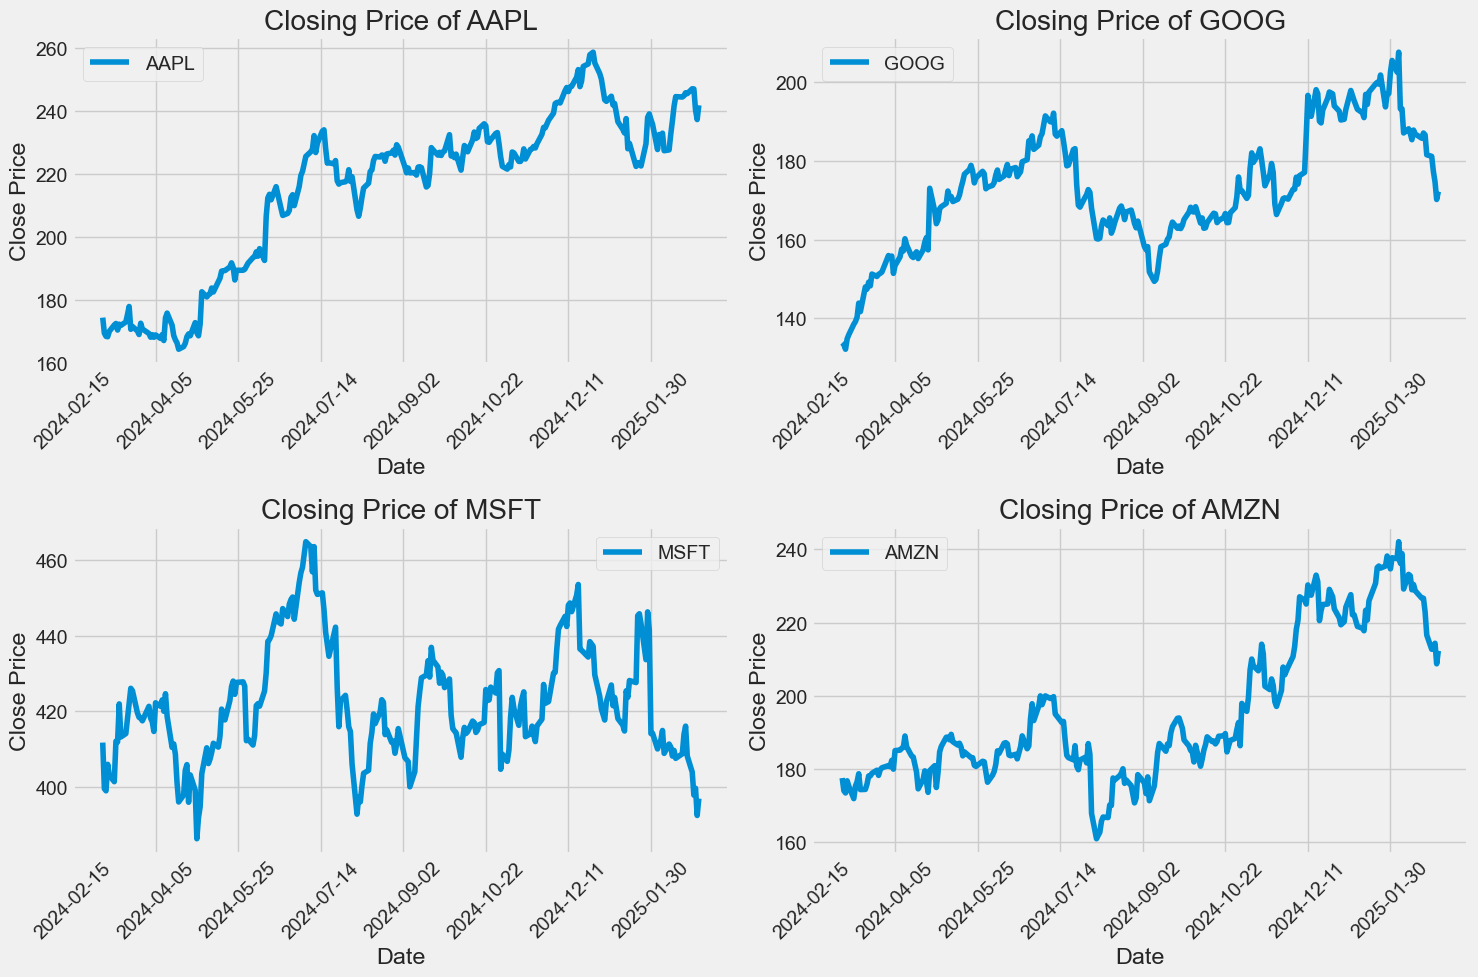

In [ ]:
#Plotting an example for closing price of all the stock under observation
import matplotlib.dates as mdates
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company.index = pd.to_datetime(company.index)  
    plt.plot(company.index, company["Close"], label=company_name[i - 1])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))  # Format dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Show every 50th day
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.ylabel("Close Price")
    plt.xlabel("Date")
    plt.title(f"Closing Price of {company_name[i - 1]}")
    plt.legend()

plt.tight_layout()
plt.show()

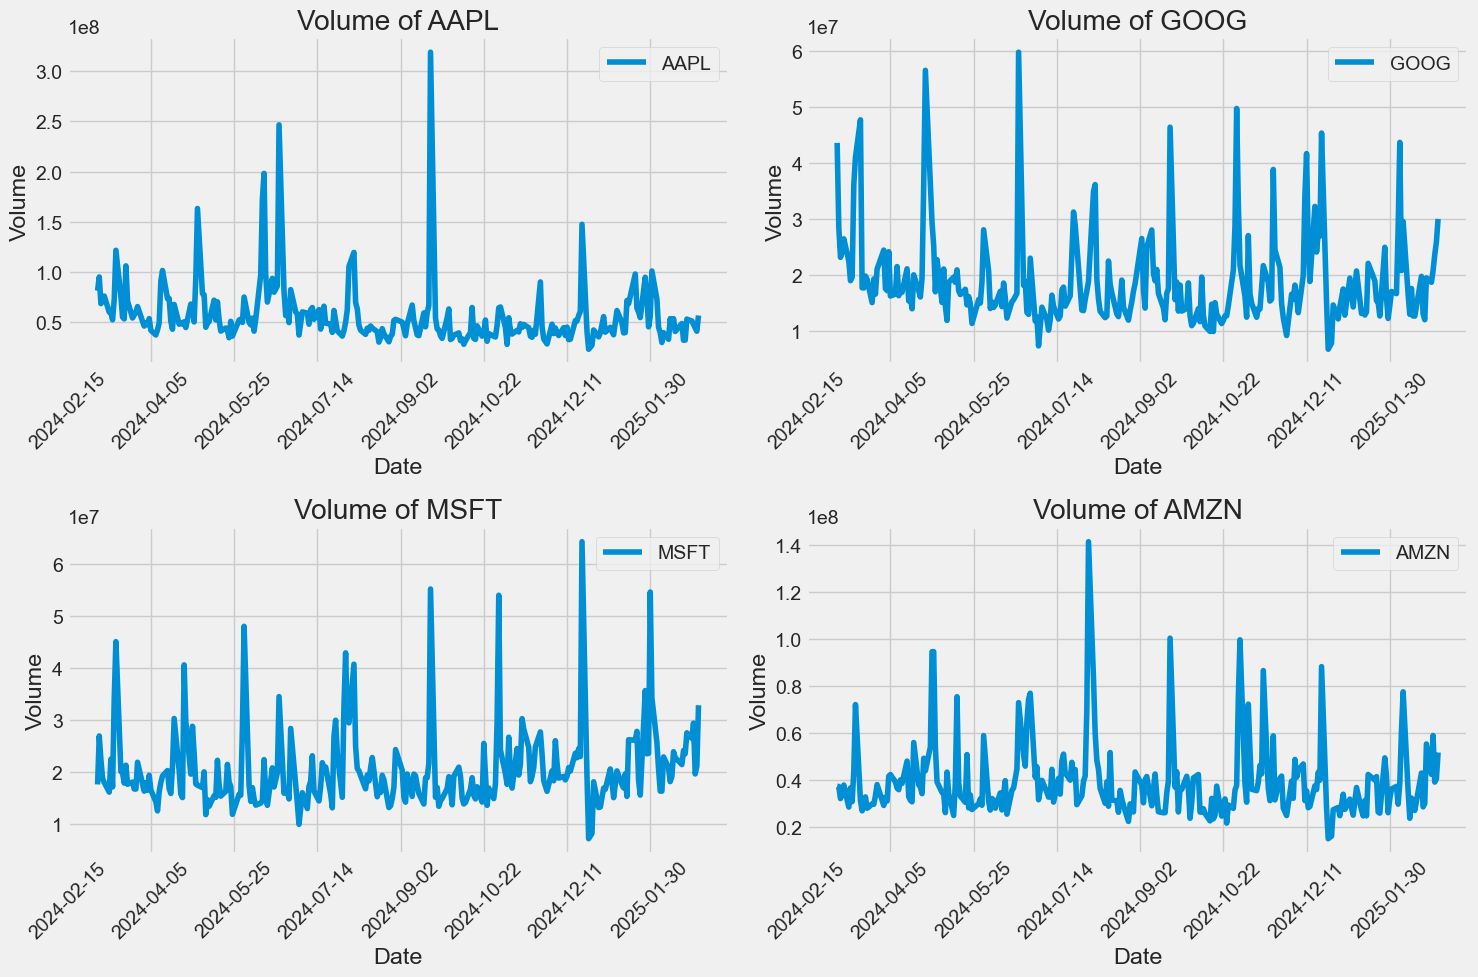

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company.index = pd.to_datetime(company.index)  
    plt.plot(company.index, company["Volume"], label=company_name[i - 1])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # Format dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Show every 50th day
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.ylabel("Volume")
    plt.xlabel("Date")
    plt.title(f"Volume of {company_name[i - 1]}")
    plt.legend()

plt.tight_layout()
plt.show()

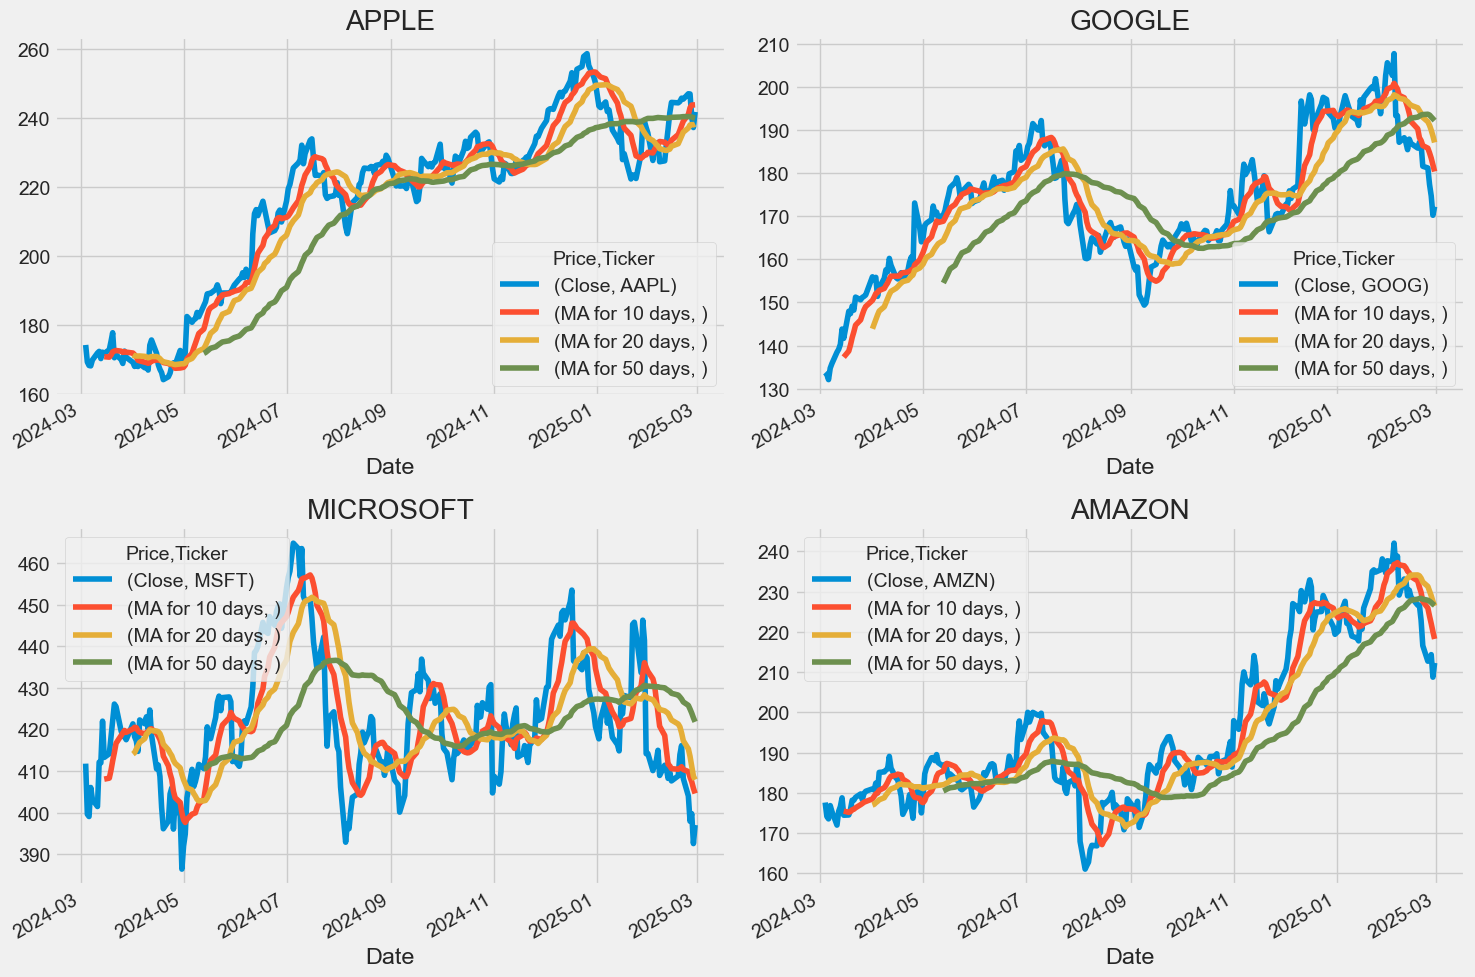

In [22]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

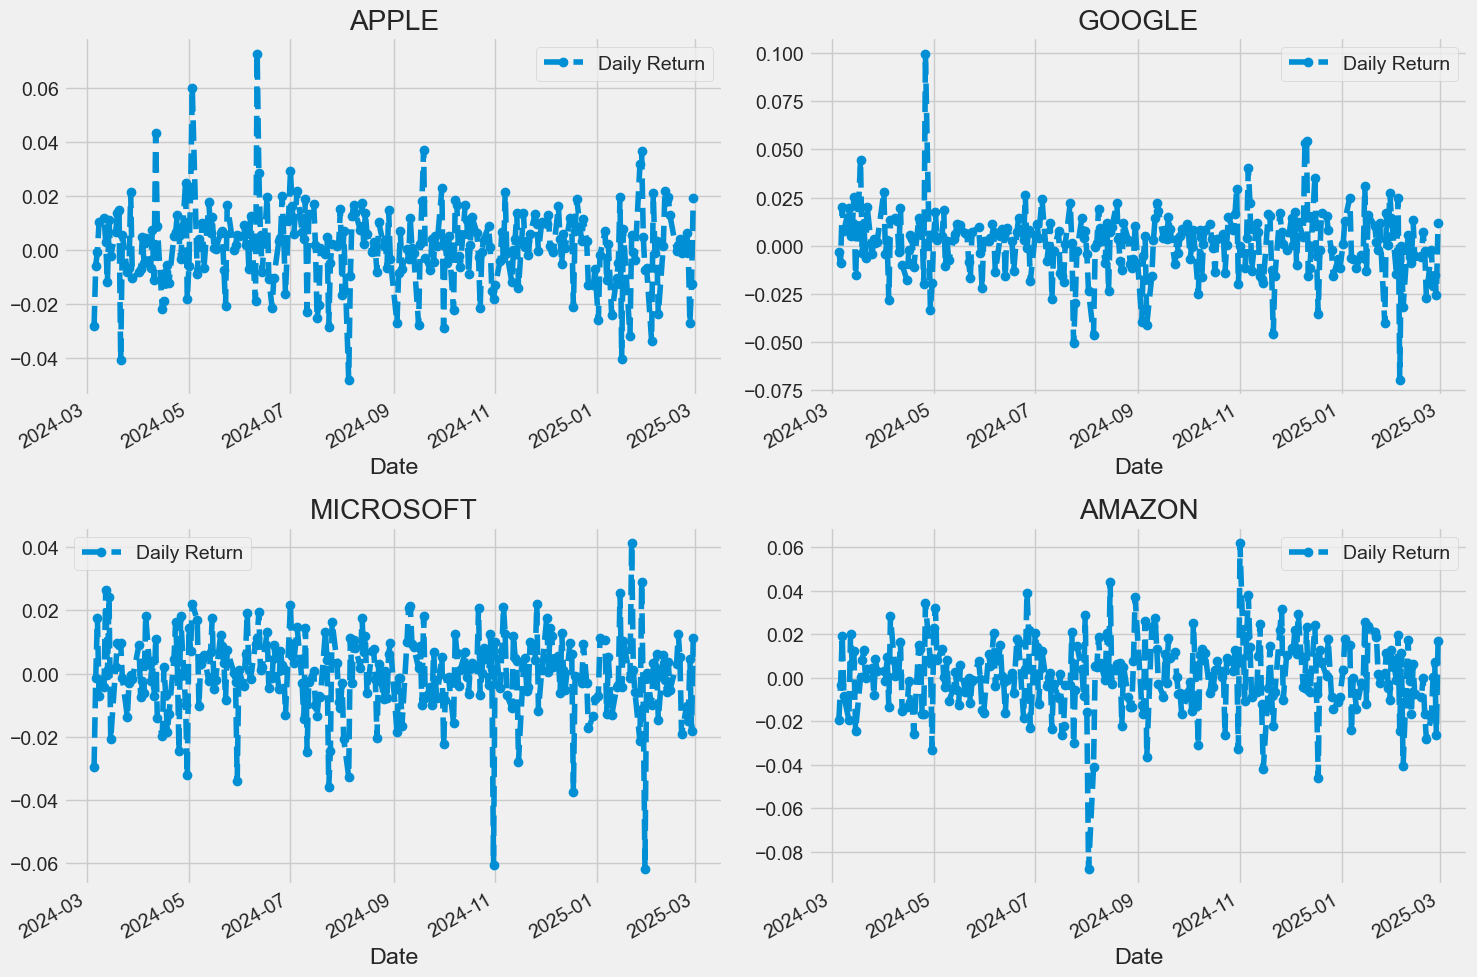

In [23]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

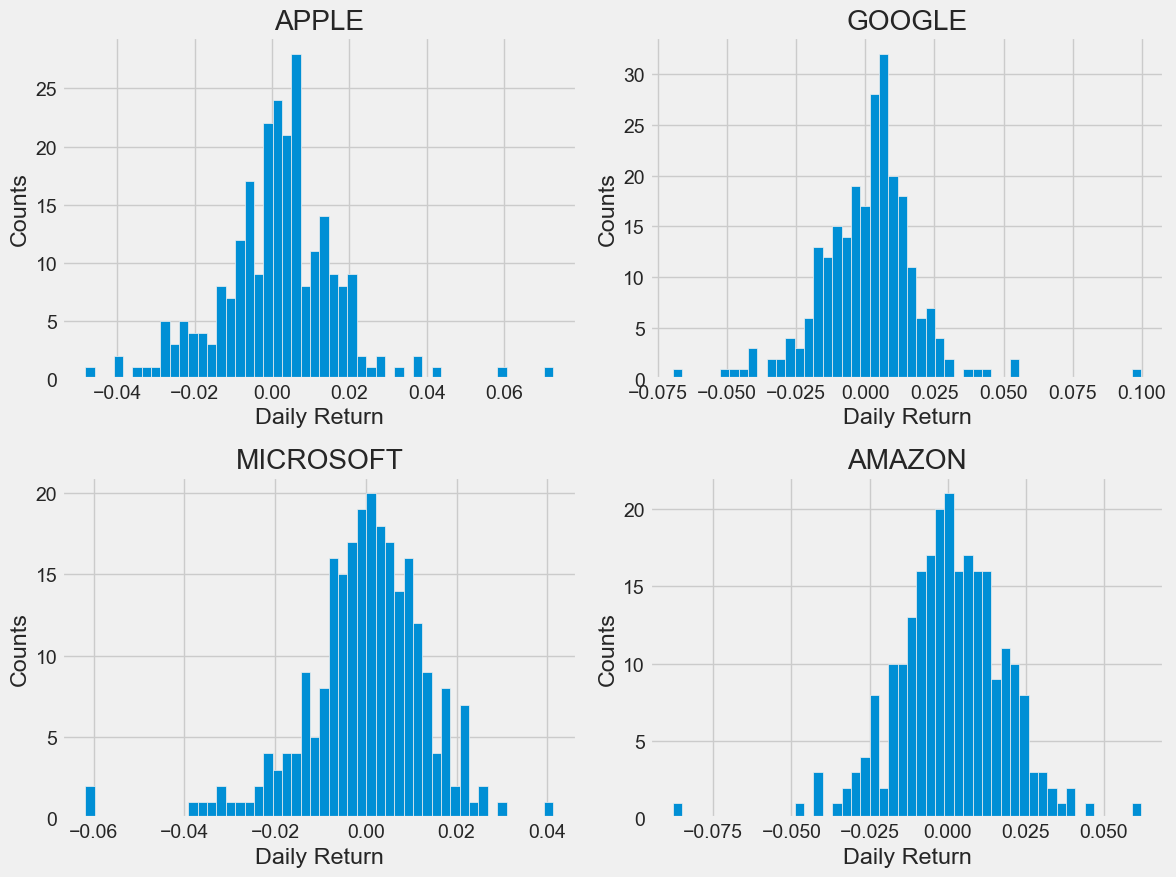

In [24]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [25]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-03-04,NaN,NaN,NaN,NaN
2024-03-05,-0.028441,-0.019484,-0.003130,-0.029572
2024-03-06,-0.005878,-0.003503,-0.009119,-0.001391
2024-03-07,-0.000710,0.019077,0.020217,0.017533
2024-03-08,0.010237,-0.008314,0.007764,-0.007137


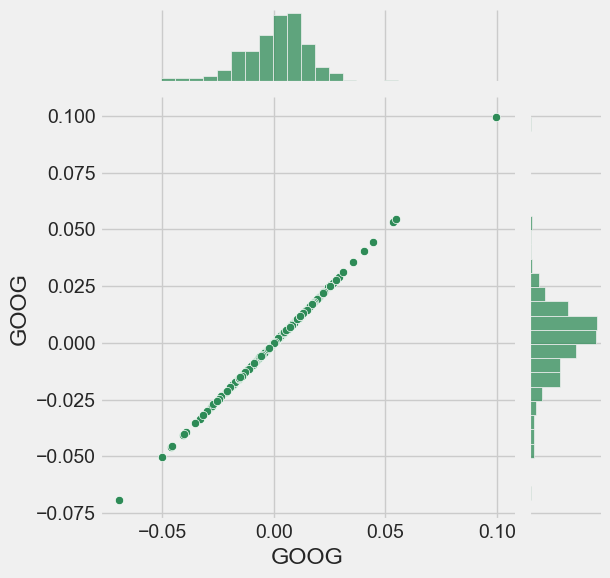

In [26]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

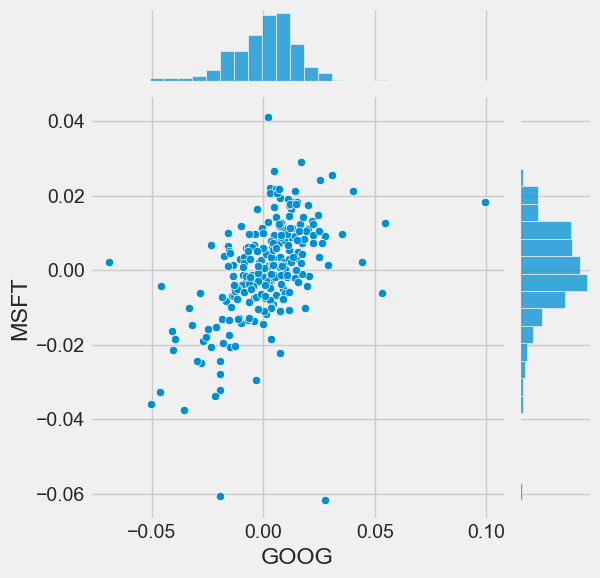

In [27]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

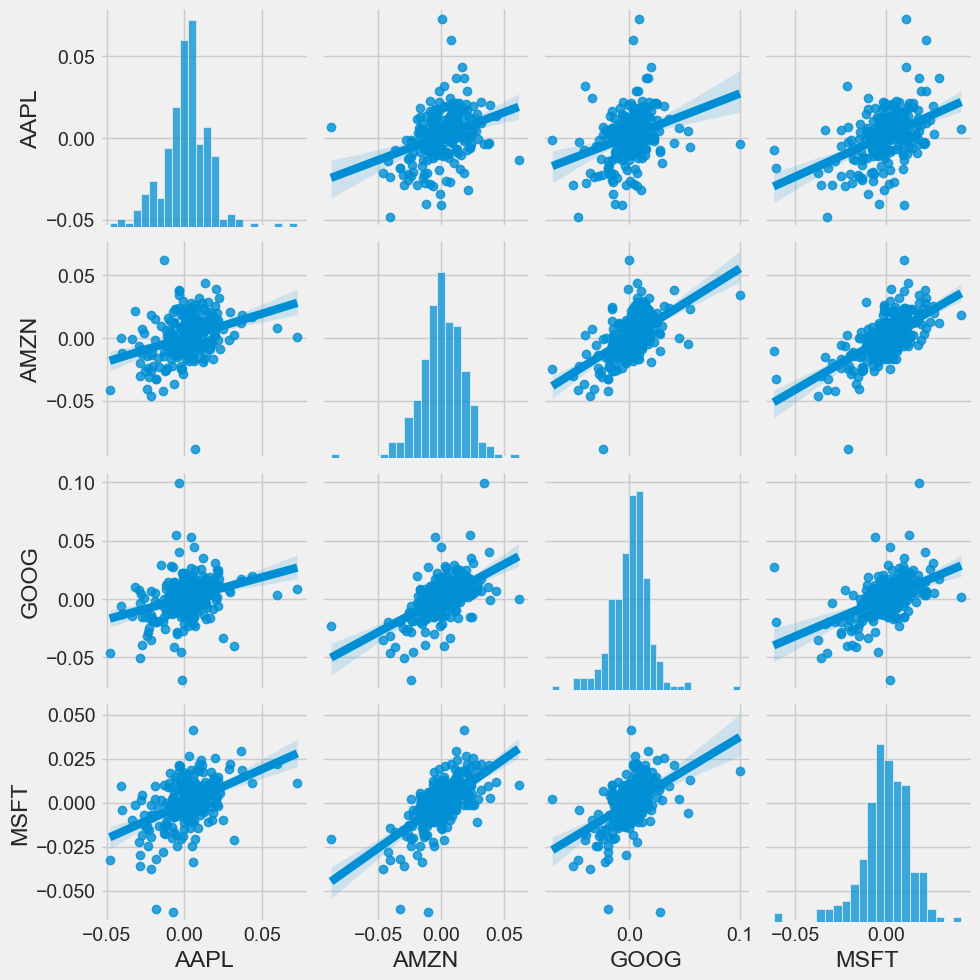

In [28]:
sns.pairplot(tech_rets, kind='reg')

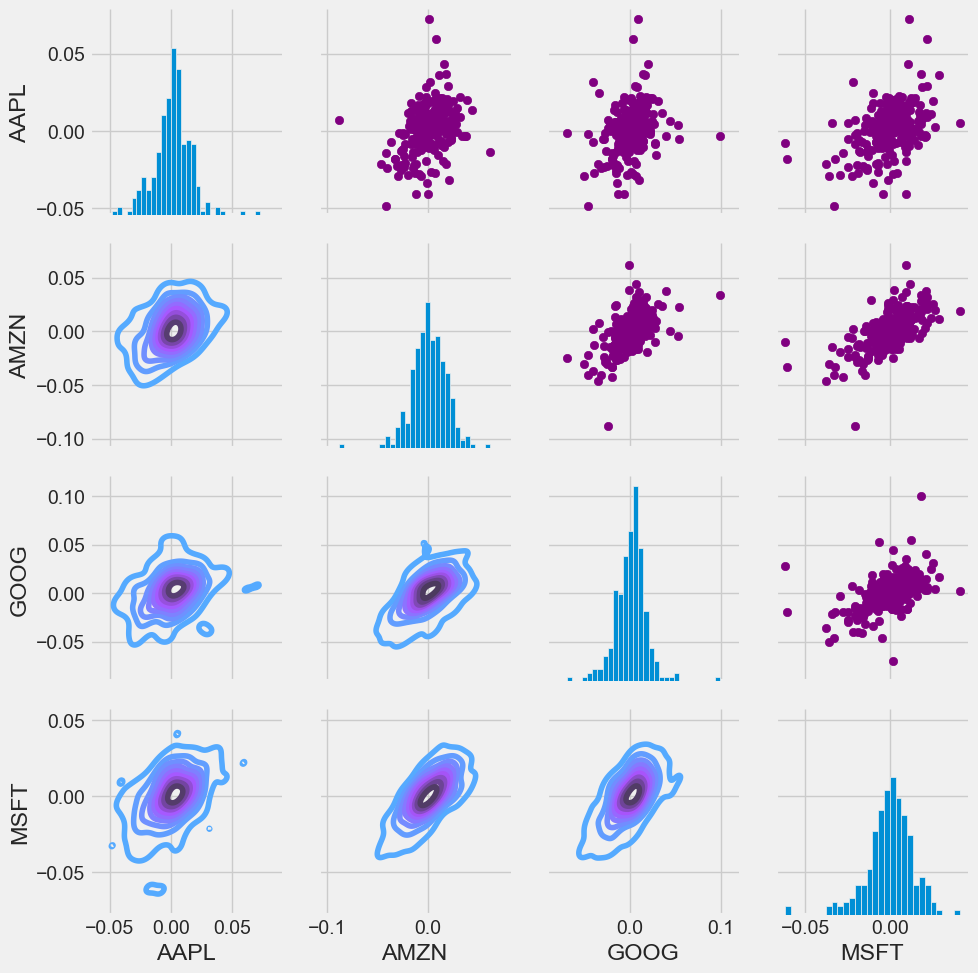

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

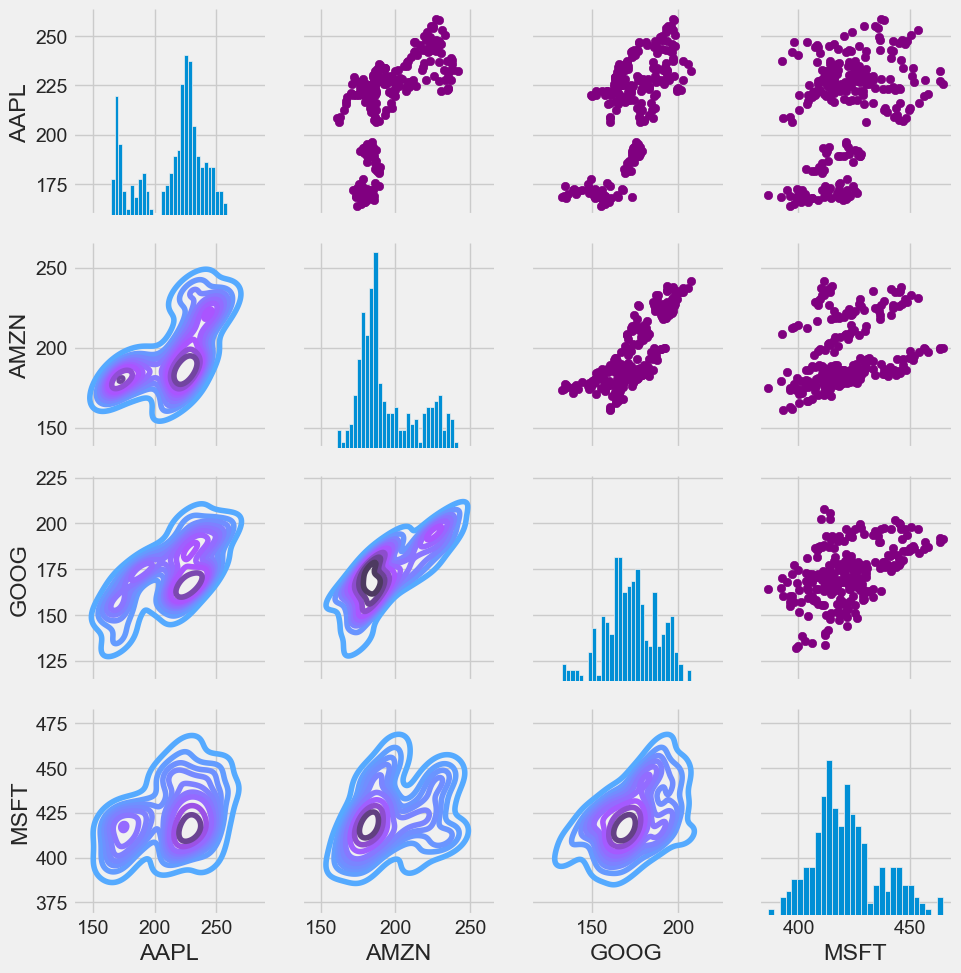

In [30]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

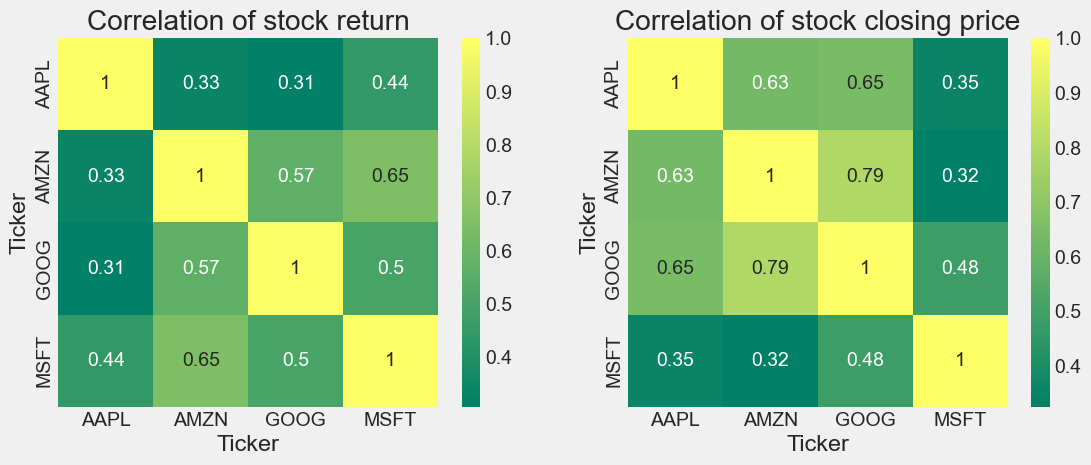

In [31]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

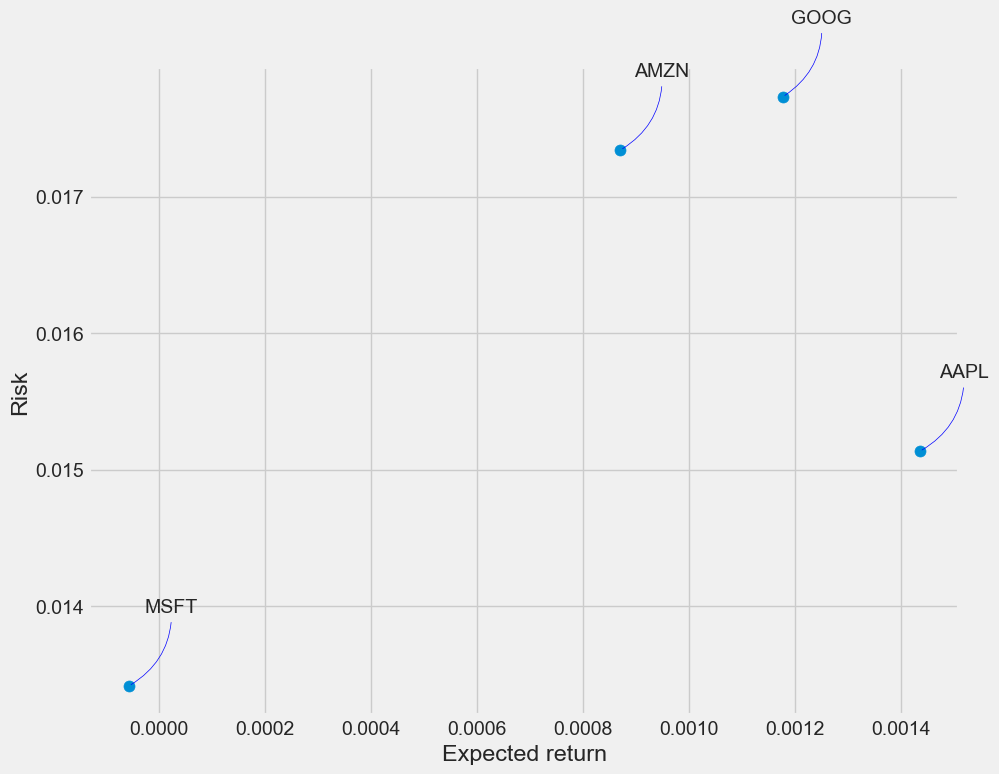

In [32]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [33]:
ticker = 'AAPL'
start_date = "2015-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")  # Convert to string format

# Fetch stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)

# Show the first few rows
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320433  24.789802  23.879981  24.778679  212818400
2015-01-05  23.635288  24.169168  23.448431  24.089086  257142000
2015-01-06  23.637508  23.897774  23.274914  23.699794  263188400
2015-01-07  23.968962  24.069063  23.735389  23.846614  160423600
2015-01-08  24.889902  24.947740  24.180287  24.298187  237458000


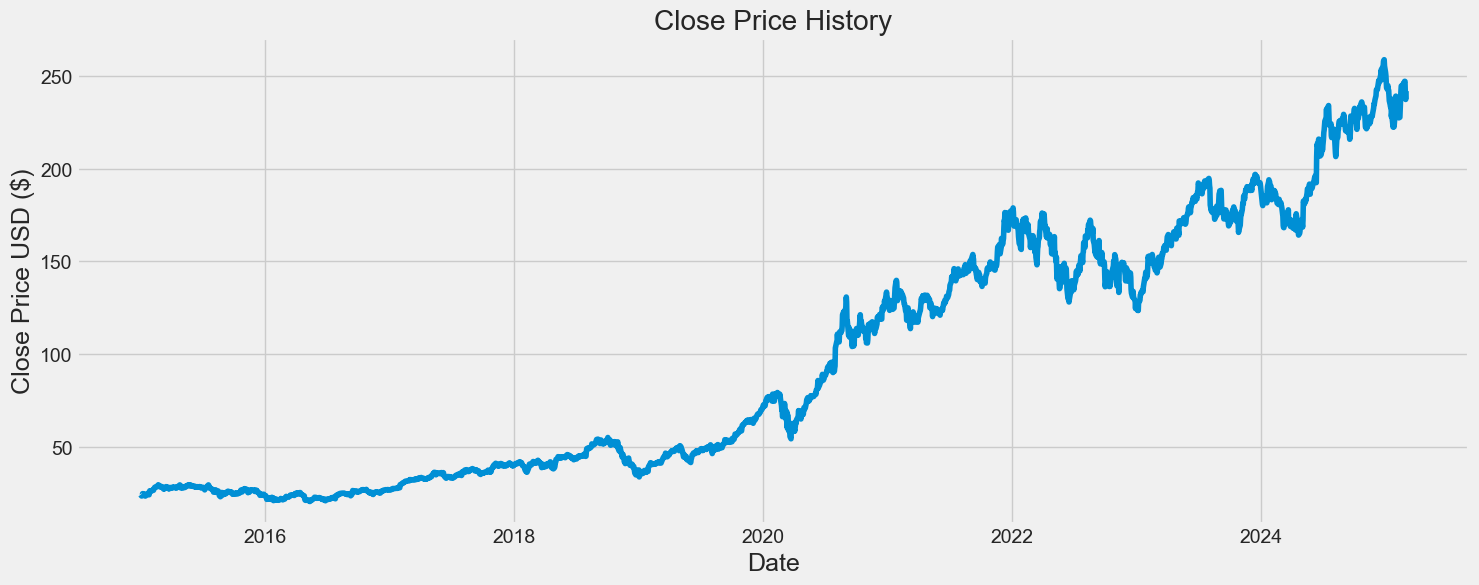

In [34]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [35]:
# Create a new dataframe with only the 'Close column 
df.columns = df.columns.get_level_values(0)
print(df.columns)
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
print(data.columns)
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Index(['Close'], dtype='object')


2428

In [36]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler


dataset = df[["Close"]].values  # Ensure it's a 2D array

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.015315  ]
 [0.01243698]
 [0.01244631]
 ...
 [0.92281178]
 [0.90995794]
 [0.92902865]]


In [37]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.015315  , 0.01243698, 0.01244631, 0.01383861, 0.01770712,
       0.01781926, 0.01524024, 0.01614663, 0.01575419, 0.01296961,
       0.01219405, 0.01474504, 0.01552058, 0.01818368, 0.01872564,
       0.01883777, 0.01513748, 0.02090284, 0.02425743, 0.02263157,
       0.02400512, 0.02402385, 0.02487416, 0.02567155, 0.02472407,
       0.02546514, 0.02762282, 0.03030583, 0.03178803, 0.03236965,
       0.03307325, 0.03390816, 0.03365485, 0.03463988, 0.0379233 ,
       0.03714466, 0.03397384, 0.03550297, 0.03366425, 0.03425528,
       0.03450858, 0.03373931, 0.03174113, 0.03191936, 0.03242594,
       0.02995869, 0.02782919, 0.0299024 , 0.02909562, 0.03037151,
       0.03233216, 0.03367363, 0.03276364, 0.03126271, 0.03249164,
       0.0320038 , 0.02889862, 0.02970542, 0.02877671, 0.03170361])]
[np.float64(0.029883662385677634)]

[array([0.015315  , 0.01243698, 0.01244631, 0.01383861, 0.01770712,
       0.01781926, 0.01524024, 0.01614663, 0.01575419, 0.01296961,
       0.01219405, 0.0

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\moksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 0.0027


In [39]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


np.float64(5.918821691297815)

C:\Users\moksh\AppData\Local\Temp\ipykernel_17468\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


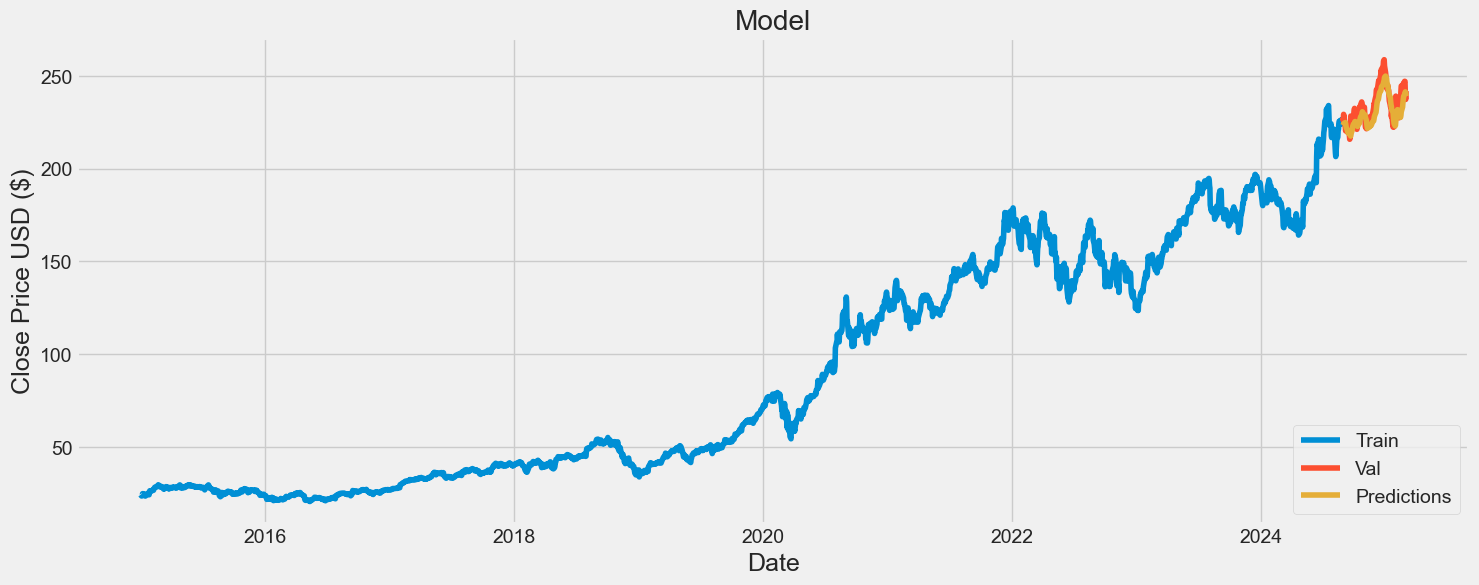

In [40]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [41]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-08-27,227.529236,223.372040
2024-08-28,225.992615,223.744995
2024-08-29,229.285370,223.853409
2024-08-30,228.497101,224.380127
2024-09-03,222.280792,224.844437
...,...,...
2025-02-24,247.100006,239.970200
2025-02-25,247.039993,240.813919
2025-02-26,240.360001,241.410217
